# 6 - Carga y preprocesamiento de datos (Ejercicios)

En este apartado, hemos estudiado uno de los componentes más importantes del ciclo de vida de los modelos de inteligencia artificial: la adquisición y manipulación de los datos. En los conjuntos de datos propuestos, tendremos por una parte la información relativa a los atributos de la muestra, y por otra los nombres de los mismos. Tu tarea será:

* Importar desde consola por comandos Linux los ficheros oportunos.
* Leer los ficheros `data` y `names`.
* Explorar el fichero `names` para analizar qué tipo de expresiones regulares necesitas para identificar los nombres de las columnas en la metadata.
* Aplicar las transformaciones *regex* pertinentes y obtener los nombres de las columnas para construir los datos. *Pista: El nombre de la variable respuesta tendremos que añadirlo al final ya que no viene explícitamente citado*.
* Realizar un conveniente preprocesmiento de las variables en función de su tipo.

## 6.1 - *Adult* [dataset](https://archive.ics.uci.edu/ml/datasets/Adult)



### Carga de datos

In [1]:
import os
import re
import pandas as pd
import numpy as np
import requests # Para descargar ficheros


Hemos de descargar los archivos adult.data y adult.name.

Para eso, se puede a traves de comandos a la terminal con wget, o directamente con la libreria request 

El primer metodo no me ha funcionado, por lo que haré el segundo

In [ ]:
# Creamos una carpeta para que contenga a nuestro dataset
!mkdir /content/adult_dataset
# Movemos el directorio activo a esa localización
%cd /content/adult_dataset

# Descargamos el fichero que contiene los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [2]:

# Preparamos una URL para el archivo .data
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'adult.data'), "wb").write(response.content)

In [3]:

# Preparamos una URL para el archivo .name
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'adult.names'), "wb").write(response.content)

In [11]:
# Ahora leemos datos
with open(os.path.join(os.getcwd(),'adult.data'),'r') as f:
    data = f.read().splitlines() # Dividimos el texto por saltos de línea
    data = [elem.split(',') for elem in data] # Dividimos cada línea por las comas y removemos líneas vacías
# Y leemos metadata
with open(os.path.join(os.getcwd(),'adult.names'),'r') as f:
    metadata = f.read().splitlines()

# Construimos una RegEx para poder asignar los titulos de cada columna (metadata) correctamente
regex_fn = lambda text: re.findall('^[a-zA-Z-]+:{1}', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z- ]+', text)

metadata_list = [regex_fn(elem)[0] for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)] + ['label']

# Construimos el objeto pd.DataFrame
df_1 = pd.DataFrame(data=data, columns=col_names)

In [21]:
df_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Preprocesamiento de los datos

<h4 align="center">Tabla de Variables</h4>


<p align="center">
  <img src="Adult/variable_table1.png" alt="Variable Table 1" />
  <img src="Adult/variable_table2.png" alt="Variable Table 2" />
</p>



Hacemos un .info() y un .describe para ver hacer un reconocimiento inicial de los datos

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  label           32561 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


Aqui vemos que todas las columnas tienen la categoria object. Para poder sacar mas informacion de las variables numericas, convertimos estas en int o float

In [12]:
# Iteramos sobre las columnas del dataset
for col in df_1.columns:
    try:
        df_1[col] = pd.to_numeric(df_1[col])
    except:
        continue
# Comprobamos que se han convertido con éxito
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education-num   32561 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  float64
 11  capital-loss    32561 non-null  float64
 12  hours-per-week  32561 non-null  float64
 13  native-country  32561 non-null  object 
 14  label           32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


In [40]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### Eliminar valores nulos

Aqui se ve como realmente apenas hay valores nulos (1 por columna, menos en la primera). Igualmente, veamos donde se encuentran estos valores nulos para decidir como los resolvemos

In [13]:
#Inspeccionamos el DF para ver si tiene valores nulos no indicados como NaN (en este caso estan como ' ?')
#Reemplazamos esos por NaN
df_1 = df_1.replace(' ?',np.nan)

# Primero vemos qué columnas tienen datos faltantes
missing_cols = list(df_1.isnull().sum(axis=0)[df_1.isnull().sum(axis=0)>0].index)

#Y con esto filtramos las filas donde hay algún dato nulo, y las columnas donde están
df_1.loc[df_1.isnull().sum(axis=1)>0]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
14,40.0,Private,121772.0,Assoc-voc,11.0,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,NaN,>50K
27,54.0,NaN,180211.0,Some-college,10.0,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K
38,31.0,Private,84154.0,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,38.0,NaN,>50K
51,18.0,Private,226956.0,HS-grad,9.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,30.0,NaN,<=50K
61,32.0,NaN,293936.0,7th-8th,4.0,Married-spouse-absent,NaN,Not-in-family,White,Male,0.0,0.0,40.0,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,30.0,NaN,33811.0,Bachelors,13.0,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0.0,0.0,99.0,United-States,<=50K
32539,71.0,NaN,287372.0,Doctorate,16.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,10.0,United-States,>50K
32541,41.0,NaN,202822.0,HS-grad,9.0,Separated,NaN,Not-in-family,Black,Female,0.0,0.0,32.0,United-States,<=50K
32542,72.0,NaN,129912.0,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0.0,0.0,25.0,United-States,<=50K


Ahora hay distintas manera de quitar estos valores nulos. Podríamos importarlos, pero de momento no lo haremos, y simplemente los quitaremos del dataset

In [14]:
#Eliminamos cualquier fila con algun valor nulo
df_1.dropna(axis=0, how='any', inplace=True)

#Y comprobamos que en efecto ya no hay filas con valores nulos
df_1.loc[df_1.isnull().sum(axis=1)>0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label


Tambien vamos a comprobar si hay alguna entrada duplicada

In [15]:
df_1.duplicated().sum()

np.int64(23)

Encontramos que 23 filas estan duplicadas. Esto en un DF de 2400 entradas, con 15 variables, es bastante poco probable, por lo que eliminamos los duplicados

In [17]:
df_1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [20]:
df_1.drop_duplicates(subset=None, keep='first', inplace=True)

#### Variables continuas

Una vez eliminados los valores nulos, vamos a estudiar las distintas variables, empezando por las continuas

In [21]:
df_1.describe().T


,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education-num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital-gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital-loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours-per-week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


Haciendo un .describe() de nuevo, vamos a fijarnos en las variables capital-gain y capital-loss. Ambas tienen una desviacion estandar mucho mayor que su media, y vemos como hasta el Q75 su valor es cero, y el maximo se dispara. Esto sugiere que la mayor parte de valores son 0, mientras que hay unos pocos valores muy grandes, que no siguen la tendencia general de los datos. A estos valores los llamaremos outliers. 

<Axes: >

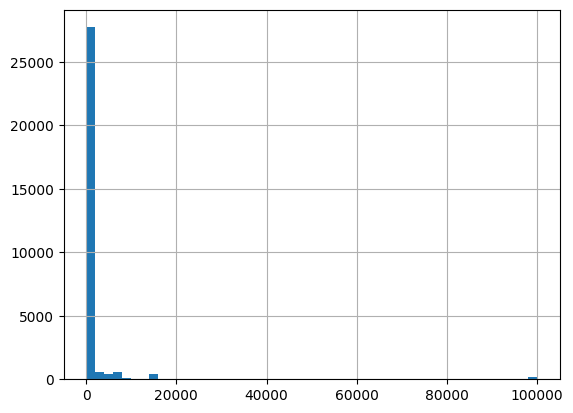

In [22]:
df_1['capital-gain'].hist(bins=50)

<Axes: >

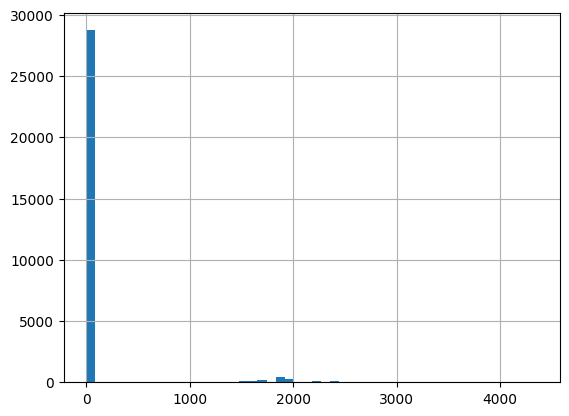

In [84]:
df_1['capital-loss'].hist(bins=50)


Los histogramas muestran lo que sospechabamos, que hay unos pocos outliers que están generando una desviación enorme y con ello están alterando las estadisticas de los datos.

Un metodo para disminuir los efectos de estos outliers sin quitarlos del dataset es la normalización. Esto significa cambiar los datos (con media mu y desviacion estandar sigma) a unos datos con media 0 y desviacion estandar 1

<Axes: >

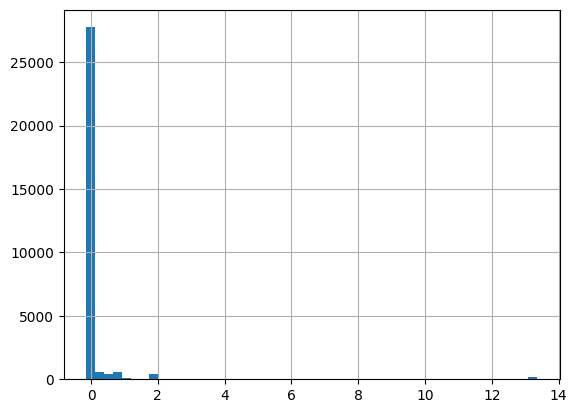

In [85]:
### ESTANDARIZACION DE LOS DATOS

#creo una funcion lambda para normalizar
norm_fn = lambda col: (col-np.mean(col))/(np.std(col))

#La aplico a la columna y vuelvo a hacer el histograma
norm_fn(df_1['capital-gain']).hist(bins=50)




<Axes: >

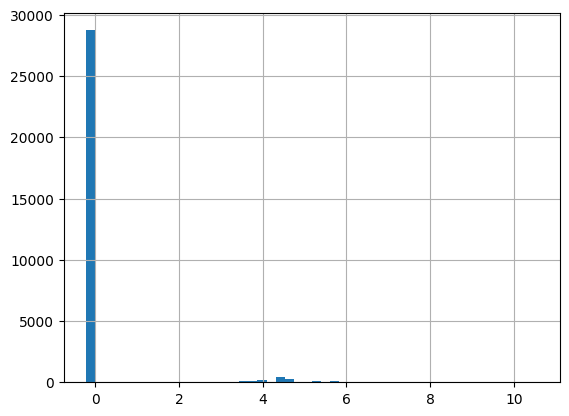

In [86]:
norm_fn(df_1['capital-loss']).hist(bins=50)


Bueno, aquí se sigue viendo como estos outliers siguen estando, pero de momento no haremos nada con ellos

<Axes: >

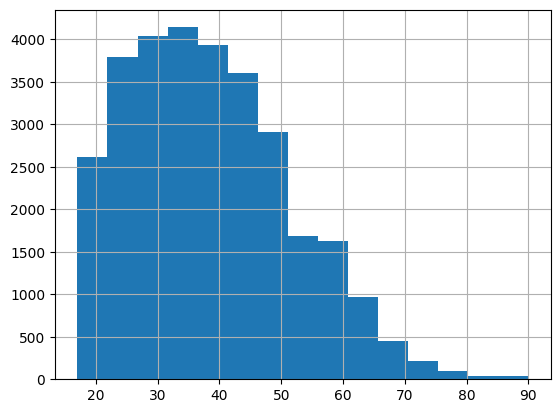

In [23]:
df_1['age'].hist(bins=15)

#### Variables discretas

##### One-hot encoding

Para prepocesar las variables discretas, hay varios metodos que podemos seguir. Uno de ellos es el One-hot encoding, que consiste en representar aquellas variables categoricas a variables binarias, añadiendo tantas nuevas variables como categorías haya. 

Este método está pensado para aplicarse a aquellas variables cuyas categorias se repiten bastante en los datos, como en este caso la raza, estado civil o clase trabajadora


In [24]:
# Importamos la funcionalidad concreta de sklearn
from sklearn.preprocessing import OneHotEncoder
# Transformamos esta columna. Usamos el método `to_array()`
# porque originalmente el encoder devuelve una matriz
# sparse (dispersa)
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_1[['race']]).toarray()
column_race = encoder.get_feature_names_out()
# Unimos la información
onehot_race_df = pd.DataFrame(data=encoded_data, columns=column_race)
# Mostramos por pantalla
onehot_race_df.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [25]:
encoded_data = encoder.fit_transform(df_1[['marital-status']]).toarray()
column_marital_status = encoder.get_feature_names_out()
# Unimos la información
onehot_marital_status_df = pd.DataFrame(data=encoded_data, columns=column_marital_status)
# Mostramos por pantalla
onehot_marital_status_df.head()

,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
encoded_data = encoder.fit_transform(df_1[['workclass']]).toarray()
column_workclass = encoder.get_feature_names_out()
# Unimos la información
onehot_workclass_df = pd.DataFrame(data=encoded_data, columns=column_workclass)
# Mostramos por pantalla
onehot_workclass_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### Label encoding

Este metodo asigna solo una nueva variable al sistema, y asigna a cada categoría un numero natural entero de manera sucesiva. Este es más útil cuando se tienen muchas categorías distintas dentro de una variable. 

En este caso lo podemos aplicar a las variables ocupación y pais natal.

In [27]:
# Importamos la funcionalidad concreta de sklearn
from sklearn.preprocessing import LabelEncoder

#creamos el contenedor de la funcion
encoder = LabelEncoder()
# Transformamos esta columna
encoded_data = encoder.fit_transform(df_1['occupation'])
# Unimos la información
labeling_occupation_df = pd.DataFrame(data=encoded_data, columns=['occupation'])
# Mostramos por pantalla
labeling_occupation_df.head()

,occupation
0,0
1,3
2,5
3,5
4,9


In [28]:
# Transformamos esta columna
encoded_data = encoder.fit_transform(df_1['native-country'])
# Unimos la información
labeling_native_country_df = pd.DataFrame(data=encoded_data, columns=['native-country'])
# Mostramos por pantalla
labeling_native_country_df.head()

,native-country
0,38
1,38
2,38
3,38
4,4


## 6.2 - Beijing Multi-Site [Air Quality Data](https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data)

En este conjunto de datos no tendremos que hacer un esfuerzo muy grande en lo relativo a estudiar la *metadata*, pero exploraremos una serie de comandos de Linux que nos será muy útil conocer:

In [9]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos un nivel
%cd ..
## Creamos carpeta
!mkdir ./content/air_quality_dataset
## Movemos directorio activo
%cd ./content/air_quality_dataset
# Descargamos fichero comprimido
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip
# Descargamos el fichero que contiene los datos a nuestro directorio activo
!tar -xf PRSA2017_Data_20130301-20170228.zip
# Nos movemos a la carpeta que contenía el zip
%cd PRSA_Data_20130301-20170228

d:\Curso_Data_Analyst\Temario\Modulo_1


d:\Curso_Data_Analyst\entorno_bootcamp\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


d:\content\air_quality_dataset


La sintaxis del comando no es correcta.
"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


[WinError 2] El sistema no puede encontrar el archivo especificado: 'PRSA_Data_20130301-20170228'
d:\content\air_quality_dataset


"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
d:\Curso_Data_Analyst\entorno_bootcamp\lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


Ahora te toca, ¿eres capaz de leer todos los `csv`, concatenarlos y construir un `pd.DataFrame` en una sola línea de código?


```python
df = pd.concat([pd.read_csv(elem) for elem in os.listdir()]).reset_index(drop=True)
```

In [30]:
path= 'D:\\Curso_Data_Analyst\\Temario\\Modulo_1\\Preprocesamiento\\Ejercicio\\content\\air_quality_dataset\\PRSA_Data_20130301-20170228'

df_2 = pd.concat([pd.read_csv(os.path.join(path, archivo)) 
                      for archivo in os.listdir(path) if archivo.endswith('.csv')], ignore_index=True)

df_2.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Preprocesamiento de los datos

Empezamos con un .info() y .describe() de igual manera

In [3]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [4]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
No,420768.0,17532.500000,10122.116943,1.0000,8766.75,17532.5,26298.25,35064.0
year,420768.0,2014.662560,1.177198,2013.0000,2014.00,2015.0,2016.00,2017.0
month,420768.0,6.522930,3.448707,1.0000,4.00,7.0,10.00,12.0
day,420768.0,15.729637,8.800102,1.0000,8.00,16.0,23.00,31.0
hour,420768.0,11.500000,6.922195,0.0000,5.75,11.5,17.25,23.0
PM2.5,412029.0,79.793428,80.822391,2.0000,20.00,55.0,111.00,999.0
PM10,414319.0,104.602618,91.772426,2.0000,36.00,82.0,145.00,999.0
SO2,411747.0,15.830835,21.650603,0.2856,3.00,7.0,20.00,500.0
NO2,408652.0,50.638586,35.127912,1.0265,23.00,43.0,71.00,290.0
CO,400067.0,1230.766454,1160.182716,100.0000,500.00,900.0,1500.00,10000.0


Lo primero que llama la atención es que no todas las variables tienen el mismo numero de datos, lo cual indica la presencia de valores nulos.

In [31]:
# Primero vemos qué columnas tienen datos faltantes
missing_cols = list(df_2.isnull().sum(axis=0)[df_2.isnull().sum(axis=0)>0].index)

#Y con esto filtramos las filas donde hay algún dato nulo, y las columnas donde están
df_2.loc[df_2.isnull().sum(axis=1)>0]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420732,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
420758,35055,2017,2,28,14,3.0,6.0,NaN,5.0000,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.0000,5.0000,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


Como no se conoce la naturaleza de los datos, vamos a ignorar los datos nulos y eliminarlos


In [32]:
#Eliminamos cualquier fila con algun valor nulo
df_2.dropna(axis=0, how='any', inplace=True)

#Y comprobamos que en efecto ya no hay filas con valores nulos
df_2.loc[df_2.isnull().sum(axis=1)>0]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.4+ MB


In [7]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
No,382168.0,17955.931070,10001.787087,1.0000,9610.0000,18103.0,26515.0,35064.0
year,382168.0,2014.714905,1.160266,2013.0000,2014.0000,2015.0,2016.0,2017.0
month,382168.0,6.475087,3.449317,1.0000,3.0000,6.0,9.0,12.0
day,382168.0,15.711308,8.803064,1.0000,8.0000,16.0,23.0,31.0
hour,382168.0,11.575184,6.933552,0.0000,6.0000,12.0,18.0,23.0
PM2.5,382168.0,79.432383,80.154901,2.0000,20.0000,55.0,111.0,844.0
PM10,382168.0,104.573837,91.379446,2.0000,36.0000,82.0,145.0,999.0
SO2,382168.0,15.634814,21.306103,0.2856,2.0000,7.0,19.0,500.0
NO2,382168.0,50.570068,35.062086,2.0000,23.0000,43.0,71.0,290.0
CO,382168.0,1229.940563,1157.151476,100.0000,500.0000,900.0,1500.0,10000.0


Tambien vamos a comprobar si hay alguna entrada duplicada

In [33]:
df_2.duplicated().sum()

np.int64(0)

Ahora se podria hacer algun tipo de encoding con las variables 'wd' y 'station', pues son las unicas no numericas. 

En este caso creo que es mas conveniente un Labeling Encoding

In [40]:
# Transformamos esta columna
encoded_data = encoder.fit_transform(df_2['station'])
# Unimos la información
labeling_occupation_df = pd.DataFrame(data=encoded_data, columns=['station'])
# Mostramos por pantalla
labeling_occupation_df.head()

,station
0,0
1,0
2,0
3,0
4,0


In [41]:
# Transformamos esta columna
encoded_data = encoder.fit_transform(df_2['wd'])
# Unimos la información
labeling_occupation_df = pd.DataFrame(data=encoded_data, columns=['wd'])
# Mostramos por pantalla
labeling_occupation_df.head()

,wd
0,6
1,3
2,6
3,7
4,3


## 6.3 - Solar flare [dataset](https://archive.ics.uci.edu/ml/datasets/Solar+Flare)

En este conjunto de datos, tendremos dos ficheros relativos a `data`, cuya primera fila serán las especificaciones temporales, por lo que deberemos quitarla, y además en los registros de datos las variables no vienen delimitadas por `','`, si no por espacios en blanco:

In [ ]:
# Movemos el directorio activo a una nueva localización para este dataset
## Retrocedemos dos niveles
%cd ..
%cd ..
## Creamos carpeta
!mkdir ./content/solar_flare_dataset
## Movemos directorio activo
%cd ./content/solar_flare_dataset
# Descargamos los ficheros que contienen los datos a nuestro directorio activo
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2
# Descargamos la metadata asociada al conjunto de datos
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names
# Leemos datos
## Leemos primer fichero de datos
with open(os.path.join(os.getcwd(),'flare.data1'),'r') as f:
    data1 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data1 = [elem.split(' ') for elem in data1 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data1 = data1[1:] # Quitamos la línea de metadata temporal
## Leemos segundo fichero de datos
with open(os.path.join(os.getcwd(),'flare.data2'),'r') as f:
    data2 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data2 = [elem.split(' ') for elem in data2 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data2 = data2[1:] # Quitamos la línea de metadata temporal
## Combinamos ambas listas
data = data1+data2
# Leemos metadata
with open(os.path.join(os.getcwd(),'flare.names'),'r') as f:
    metadata = f.read().splitlines()
## Regex
regex_fn = lambda text: re.findall('^\s+[0-9]+\.{1}\s{1}[a-zA-Z- ]+', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0].strip() for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)]
# Construimos el objeto pd.DataFrame
df = pd.DataFrame(data=data, columns=col_names)

In [2]:

# Preparamos una URL para el archivo .data
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data1'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'flare.data1'), "wb").write(response.content)

In [3]:

# Preparamos una URL para el archivo .data
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.data2'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'flare.data2'), "wb").write(response.content)

In [4]:
# Preparamos una URL para el archivo .name
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/solar-flare/flare.names'

# Descargamos el fichero
with requests.get(URL) as response:
    open(os.path.join(os.getcwd(), 'flare.names'), "wb").write(response.content)

In [5]:
## Leemos primer fichero de datos
with open(os.path.join(os.getcwd(),'flare.data1'),'r') as f:
    data1 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data1 = [elem.split(' ') for elem in data1 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data1 = data1[1:] # Quitamos la línea de metadata temporal
## Leemos segundo fichero de datos
with open(os.path.join(os.getcwd(),'flare.data2'),'r') as f:
    data2 = f.read().splitlines() # Dividimos el texto por saltos de línea
    data2 = [elem.split(' ') for elem in data2 if elem!=''] # Dividimos cada línea por las comas y removemos líneas vacías
    data2 = data2[1:] # Quitamos la línea de metadata temporal
## Combinamos ambas listas
data = data1+data2
# Leemos metadata
with open(os.path.join(os.getcwd(),'flare.names'),'r') as f:
    metadata = f.read().splitlines()
## Regex
regex_fn = lambda text: re.findall('^\s+[0-9]+\.{1}\s{1}[a-zA-Z- ]+', text)
reg_text_fn = lambda text : re.findall('[a-zA-Z-]+', text)
metadata_list = [regex_fn(elem)[0].strip() for elem in metadata if regex_fn(elem)]
col_names = [reg_text_fn(elem)[0] for elem in metadata_list if reg_text_fn(elem)]
# Construimos el objeto pd.DataFrame
df_3 = pd.DataFrame(data=data, columns=col_names)

df_3.head()

,Code,Code,Code,Activity,Evolution,Previous,Historically-complex,Did,Area,Area,C-class,M-class,X-class
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [6]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Code                  1389 non-null   object
 1   Code                  1389 non-null   object
 2   Code                  1389 non-null   object
 3   Activity              1389 non-null   object
 4   Evolution             1389 non-null   object
 5   Previous              1389 non-null   object
 6   Historically-complex  1389 non-null   object
 7   Did                   1389 non-null   object
 8   Area                  1389 non-null   object
 9   Area                  1389 non-null   object
 10  C-class               1389 non-null   object
 11  M-class               1389 non-null   object
 12  X-class               1389 non-null   object
dtypes: object(13)
memory usage: 141.2+ KB


In [7]:
df_3.describe()

,Code,Code,Code,Activity,Evolution,Previous,Historically-complex,Did,Area,Area,C-class,M-class,X-class
count,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389,1389
unique,6,6,4,2,3,3,2,2,2,2,8,6,3
top,H,S,O,1,3,1,1,2,1,1,0,0,0
freq,396,514,627,1180,680,1320,839,1239,1353,1145,1171,1321,1377
